In [14]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Paths to raw data
LISTINGS_PATH = "../data/raw/New York/New York City/listings.csv"
CALENDAR_PATH = "../data/raw/New York/New York City/calendar.csv"
SAVE_PATH = "../data/processed/New York/New York City"

os.makedirs(SAVE_PATH, exist_ok=True)

In [3]:
# Load the cleaned dataset
df_listing = pd.read_csv(LISTINGS_PATH)
df_calendar = pd.read_csv(CALENDAR_PATH)

/var/folders/yb/80601nfd1_ddx2zjz03hh5kh0000gn/T/ipykernel_61306/2530707874.py:3: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df_calendar = pd.read_csv(CALENDAR_PATH)


In [4]:
# View shape and column names
print(f"Rows: {df_listing.shape[0]}, Columns: {df_listing.shape[1]}")
print("Columns:", df_listing.columns.tolist())
df_listing.head(5)

Rows: 37018, Columns: 79
Columns: ['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name', 'description', 'neighborhood_overview', 'picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability', 'availability_30', 'availability_

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2539,https://www.airbnb.com/rooms/2539,20250501160219,2025-05-02,previous scrape,Superfast Wi-Fi. Clean & quiet home by the park,Renovated apartment home in an elevator buildi...,Close to Prospect Park and Historic Ditmas Park,https://a0.muscache.com/pictures/hosting/Hosti...,2787,...,5.0,4.75,4.88,NaN,f,5,1,4,0,0.08
1,2595,https://www.airbnb.com/rooms/2595,20250501160219,2025-05-02,city scrape,Skylit Midtown Manhattan Spacious Studio,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,https://a0.muscache.com/pictures/miso/Hosting-...,2845,...,4.8,4.81,4.40,NaN,f,3,3,0,0,0.26
2,5136,https://www.airbnb.com/rooms/5136,20250501160219,2025-05-02,city scrape,Spacious Family Friendly Duplex w/ Patio + Yard,"We welcome you to stay in our lovely 2 br, 130...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,7378,...,5.0,4.75,4.75,NaN,t,1,1,0,0,0.03
3,6848,https://www.airbnb.com/rooms/6848,20250501160219,2025-05-01,city scrape,Only 2 stops to Manhattan studio,Comfortable studio apartment with super comfor...,NaN,https://a0.muscache.com/pictures/e4f031a7-f146...,15991,...,4.8,4.69,4.58,NaN,f,1,1,0,0,1.00
4,6872,https://www.airbnb.com/rooms/6872,20250501160219,2025-05-01,city scrape,Uptown Sanctuary w/ Private Bath (Month to Month),This charming distancing-friendly month-to-mon...,This sweet Harlem sanctuary is a 10-20 minute ...,https://a0.muscache.com/pictures/miso/Hosting-...,16104,...,5.0,5.00,5.00,NaN,f,2,0,2,0,0.03


In [5]:
# View shape and column names
print(f"Rows: {df_calendar.shape[0]}, Columns: {df_calendar.shape[1]}")
print("Columns:", df_calendar.columns.tolist())
df_calendar.head(5)

Rows: 13499675, Columns: 7
Columns: ['listing_id', 'date', 'available', 'price', 'adjusted_price', 'minimum_nights', 'maximum_nights']


,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,2539,2025-05-02,f,$299.00,NaN,30.0,730.0
1,2539,2025-05-03,f,$299.00,NaN,30.0,730.0
2,2539,2025-05-04,f,$299.00,NaN,30.0,730.0
3,2539,2025-05-05,f,$299.00,NaN,30.0,730.0
4,2539,2025-05-06,f,$299.00,NaN,30.0,730.0


## Data Cleaning & Preprocessing

In [6]:
# Load listings.csv
# listings = pd.read_csv(LISTINGS_PATH, low_memory=False)
print(f"Original listings shape: {df_listing.shape}")

# Keep only necessary columns
df_listing = df_listing[[
    'id', 'neighbourhood_cleansed', 'latitude', 'longitude',
    'room_type', 'minimum_nights', 'number_of_reviews',
    'review_scores_rating', 'availability_365'
]].copy()

# Rename for consistency
df_listing.rename(columns={'id': 'listing_id'}, inplace=True)

# Impute missing values
df_listing['review_scores_rating'] = df_listing['review_scores_rating'].fillna(df_listing['review_scores_rating'].median())
df_listing['number_of_reviews'] = df_listing['number_of_reviews'].fillna(0)

# One-hot encode categorical features
listings = pd.get_dummies(df_listing, columns=['room_type', 'neighbourhood_cleansed'], drop_first=True)

print(f"Cleaned listings shape: {listings.shape}")
listings.head()


Original listings shape: (37018, 79)
Cleaned listings shape: (37018, 233)


,listing_id,latitude,longitude,minimum_nights,number_of_reviews,review_scores_rating,availability_365,room_type_Hotel room,room_type_Private room,room_type_Shared room,...,neighbourhood_cleansed_Westerleigh,neighbourhood_cleansed_Whitestone,neighbourhood_cleansed_Williamsbridge,neighbourhood_cleansed_Williamsburg,neighbourhood_cleansed_Willowbrook,neighbourhood_cleansed_Windsor Terrace,neighbourhood_cleansed_Woodhaven,neighbourhood_cleansed_Woodlawn,neighbourhood_cleansed_Woodrow,neighbourhood_cleansed_Woodside
0,2539,40.64529,-73.97238,30,9,4.89,343,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,2595,40.75356,-73.98559,30,49,4.68,365,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,5136,40.66265,-73.99454,30,4,4.75,37,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,6848,40.70935,-73.95342,30,195,4.58,182,False,False,False,...,False,False,False,True,False,False,False,False,False,False
4,6872,40.80107,-73.94255,30,1,5.00,83,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [7]:
# Load calendar.csv
# calendar = pd.read_csv(CALENDAR_PATH)
print(f"Original calendar shape: {df_calendar.shape}")

# Convert date column to datetime
df_calendar['date'] = pd.to_datetime(df_calendar['date'])

# Clean price column
df_calendar['price'] = (
    df_calendar['price']
    .astype(str)
    .str.replace(r'[\$,]', '', regex=True)
    .astype(float)
)

# Drop NA and zero price rows
calendar = df_calendar.dropna(subset=['price'])
calendar = calendar[calendar['price'] > 0]

print(f"Cleaned calendar shape: {calendar.shape}")
calendar.head()


Original calendar shape: (13499675, 7)
Cleaned calendar shape: (13498580, 7)


,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,2539,2025-05-02,f,299.0,NaN,30.0,730.0
1,2539,2025-05-03,f,299.0,NaN,30.0,730.0
2,2539,2025-05-04,f,299.0,NaN,30.0,730.0
3,2539,2025-05-05,f,299.0,NaN,30.0,730.0
4,2539,2025-05-06,f,299.0,NaN,30.0,730.0


In [8]:
# Merge on listing_id
df_merge = pd.merge(calendar, listings, on='listing_id', how='inner')
print(f"Merged dataframe shape: {df_merge.shape}")
df_merge.head(5)

Merged dataframe shape: (13498580, 239)


,listing_id,date,available,price,adjusted_price,minimum_nights_x,maximum_nights,latitude,longitude,minimum_nights_y,...,neighbourhood_cleansed_Westerleigh,neighbourhood_cleansed_Whitestone,neighbourhood_cleansed_Williamsbridge,neighbourhood_cleansed_Williamsburg,neighbourhood_cleansed_Willowbrook,neighbourhood_cleansed_Windsor Terrace,neighbourhood_cleansed_Woodhaven,neighbourhood_cleansed_Woodlawn,neighbourhood_cleansed_Woodrow,neighbourhood_cleansed_Woodside
0,2539,2025-05-02,f,299.0,NaN,30.0,730.0,40.64529,-73.97238,30,...,False,False,False,False,False,False,False,False,False,False
1,2539,2025-05-03,f,299.0,NaN,30.0,730.0,40.64529,-73.97238,30,...,False,False,False,False,False,False,False,False,False,False
2,2539,2025-05-04,f,299.0,NaN,30.0,730.0,40.64529,-73.97238,30,...,False,False,False,False,False,False,False,False,False,False
3,2539,2025-05-05,f,299.0,NaN,30.0,730.0,40.64529,-73.97238,30,...,False,False,False,False,False,False,False,False,False,False
4,2539,2025-05-06,f,299.0,NaN,30.0,730.0,40.64529,-73.97238,30,...,False,False,False,False,False,False,False,False,False,False


In [9]:
# Drop only if 'price' is NaN
df_clean_merge = df_merge.dropna(subset=['price'])

# Save cleaned dataset
output_path = os.path.join(SAVE_PATH, "merged_airbnb_data.csv")
df_clean_merge.to_csv(output_path, index=False)
print(f"Shape of Merged dataframe after clean: {df_clean_merge.shape}")
print(f"✅ Cleaned and merged dataset saved to: {output_path}")


Shape of Merged dataframe after clean: (13498580, 239)
✅ Cleaned and merged dataset saved to: ../data/processed/New York/New York City/merged_airbnb_data.csv


In [10]:
merged_data = "../data/processed/New York/New York City/merged_airbnb_data.csv"
df_processed = pd.read_csv(merged_data)

row_count = len(df_processed)
print(f'The CSV file has {row_count} rows.')
print(f"Merged dataframe shape: {df_merge.shape}")

/var/folders/yb/80601nfd1_ddx2zjz03hh5kh0000gn/T/ipykernel_61306/774867611.py:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df_processed = pd.read_csv(merged_data)


The CSV file has 13498580 rows.
Merged dataframe shape: (13498580, 239)


## Exploratory Data Analysis (EDA)

/var/folders/yb/80601nfd1_ddx2zjz03hh5kh0000gn/T/ipykernel_61306/3958203933.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(merged_data, parse_dates=['date'])


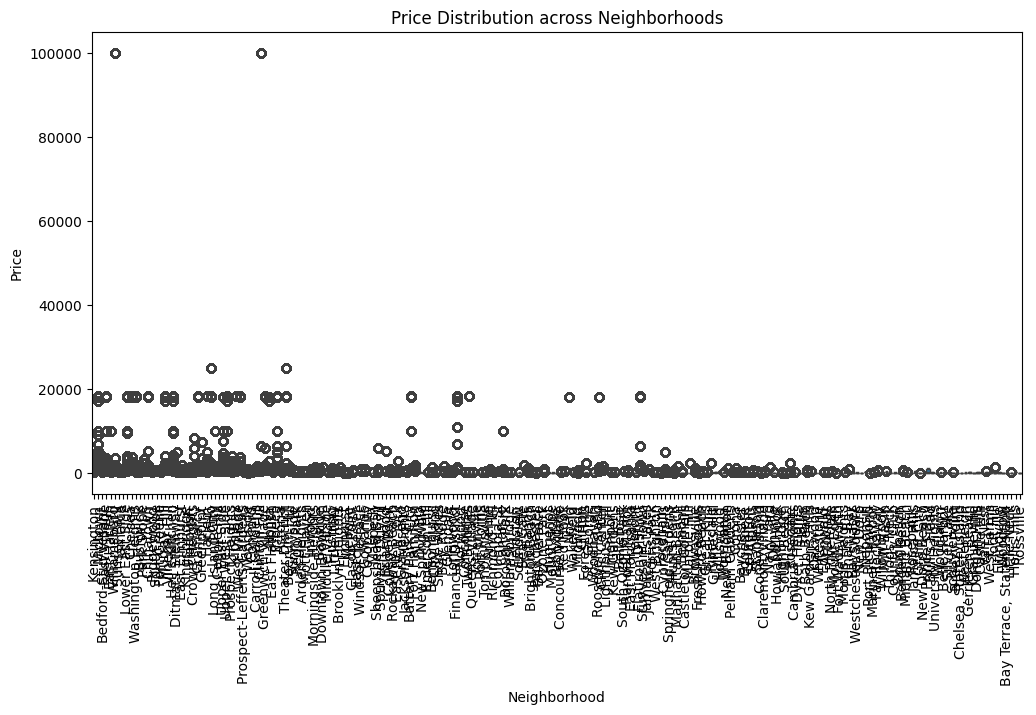

In [15]:
df = pd.read_csv(merged_data, parse_dates=['date'])
# === 1️⃣ Price Distribution by Neighborhood ===
neighborhood_cols = [col for col in df.columns if col.startswith('neighbourhood_cleansed_')]
df['neighborhood'] = df[neighborhood_cols].idxmax(axis=1).str.replace('neighbourhood_cleansed_', '')

plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='neighborhood', y='price')
plt.xticks(rotation=90)
plt.title('Price Distribution across Neighborhoods')
plt.ylabel('Price')
plt.xlabel('Neighborhood')
plt.show()

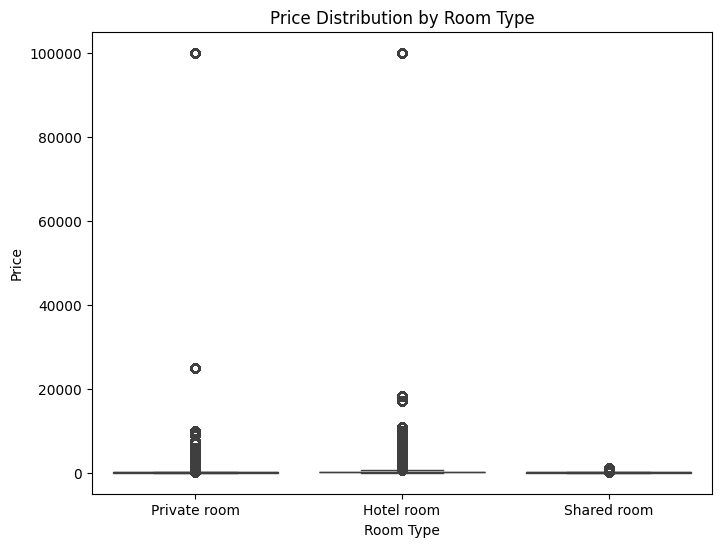

In [16]:
# === 2️⃣ Price Distribution by Room Type ===
room_cols = [col for col in df.columns if col.startswith('room_type_')]
df['room_type'] = df[room_cols].idxmax(axis=1).str.replace('room_type_', '')

plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='room_type', y='price')
plt.title('Price Distribution by Room Type')
plt.ylabel('Price')
plt.xlabel('Room Type')
plt.show()

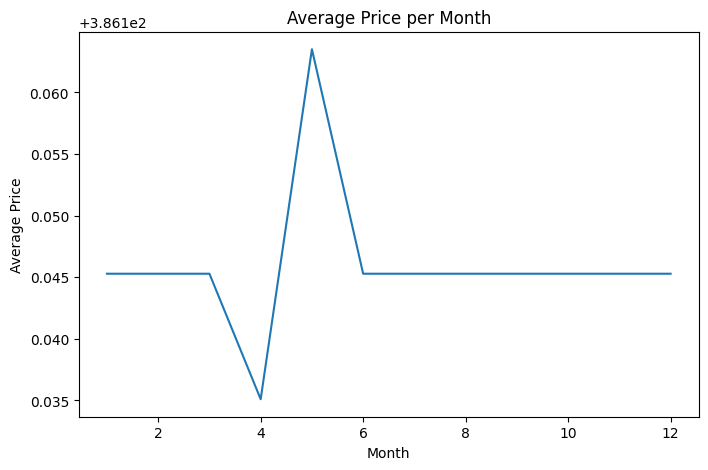

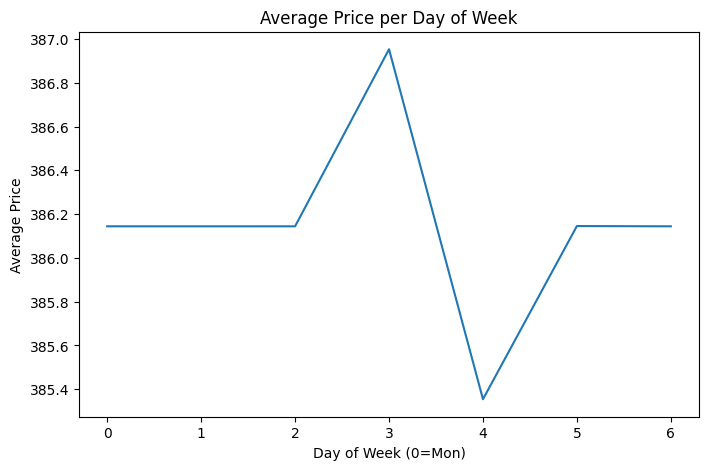

In [17]:
# === 3️⃣ Seasonality: Avg Price per Month & Day ===
df['month'] = df['date'].dt.month
df['day_of_week'] = df['date'].dt.dayofweek

monthly_avg = df.groupby('month')['price'].mean()
daily_avg = df.groupby('day_of_week')['price'].mean()

plt.figure(figsize=(8,5))
sns.lineplot(x=monthly_avg.index, y=monthly_avg.values)
plt.title('Average Price per Month')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.show()

plt.figure(figsize=(8,5))
sns.lineplot(x=daily_avg.index, y=daily_avg.values)
plt.title('Average Price per Day of Week')
plt.xlabel('Day of Week (0=Mon)')
plt.ylabel('Average Price')
plt.show()

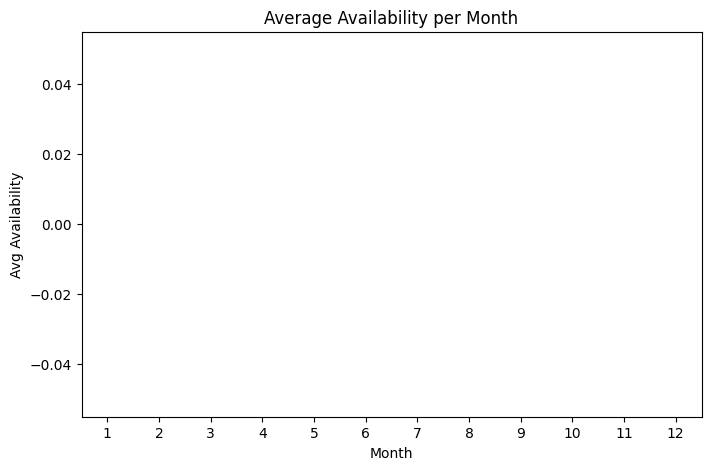

In [22]:
# === 4️⃣ Availability Trend (avg availability by month) ===
df['available'] = pd.to_numeric(df['available'], errors='coerce')

monthly_availability = df.groupby('month')['available'].mean()

plt.figure(figsize=(8,5))
sns.barplot(x=monthly_availability.index, y=monthly_availability.values)
plt.title('Average Availability per Month')
plt.xlabel('Month')
plt.ylabel('Avg Availability')
plt.show()

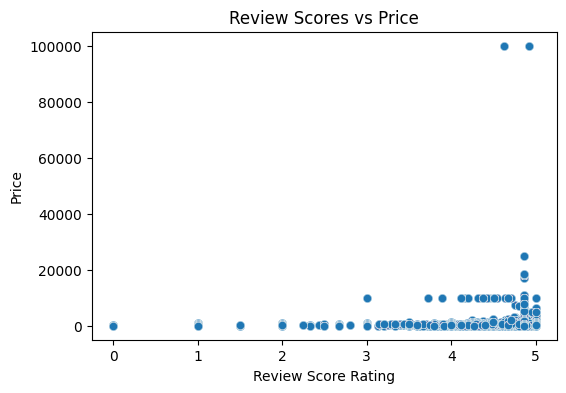

In [23]:
# === 5️⃣ Correlation: Review Scores vs Price ===
plt.figure(figsize=(6,4))
sns.scatterplot(x=df['review_scores_rating'], y=df['price'], alpha=0.2)
plt.title('Review Scores vs Price')
plt.xlabel('Review Score Rating')
plt.ylabel('Price')
plt.show()

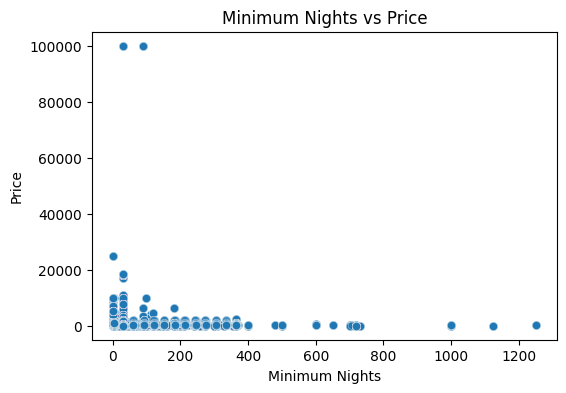

In [27]:
# === 6️⃣ Correlation: Minimum Nights vs Price ===
plt.figure(figsize=(6,4))
sns.scatterplot(x=df['minimum_nights_x'], y=df['price'], alpha=0.2)
plt.title('Minimum Nights vs Price')
plt.xlabel('Minimum Nights')
plt.ylabel('Price')
plt.show()

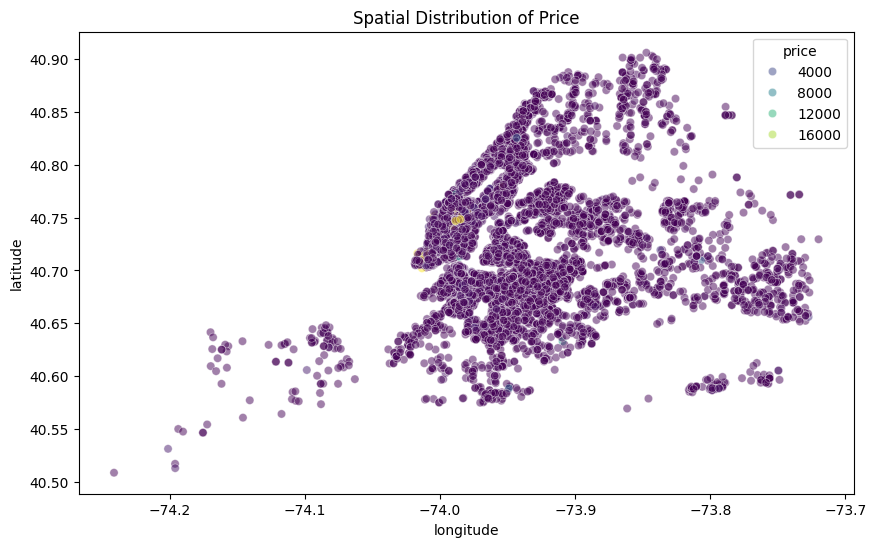

In [20]:
# === 7️⃣ Location vs Price (Spatial) ===
plt.figure(figsize=(10,6))
sns.scatterplot(x='longitude', y='latitude', hue='price', data=df.sample(10000), palette='viridis', alpha=0.5)
plt.title('Spatial Distribution of Price')
plt.show()